In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import math

In [2]:
df=pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
median_bedrooms=math.floor(df.bedrooms.median())

In [8]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [15]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [11]:
reg.intercept_

221323.0018654043

In [12]:
reg.predict([[3000,3,40]])

C:\Users\chott\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [17]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.0018654043

498408.2515740243

In [18]:
reg.predict([[2500,4,5]])

C:\Users\chott\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\chott\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


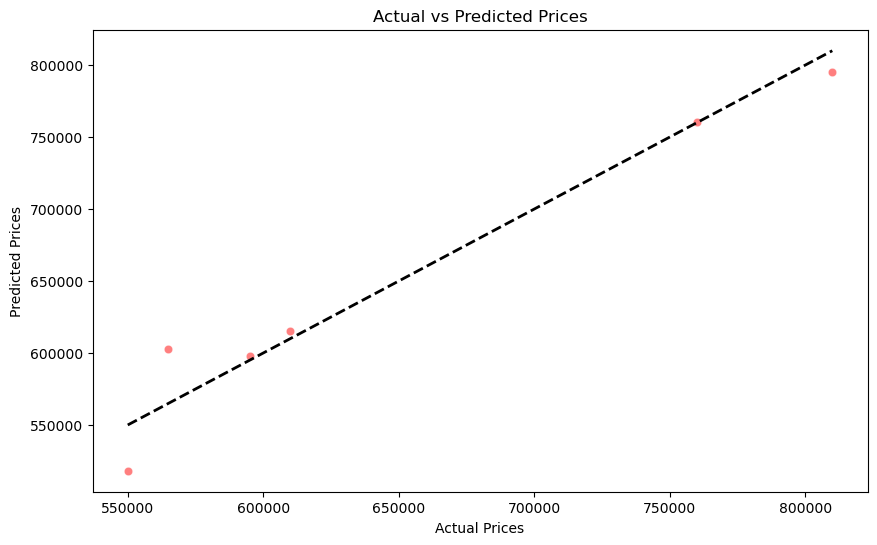

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.price,reg.predict(df[['area','bedrooms','age']]),color="red",alpha=0.5)
plt.plot([df['price'].min(),df['price'].max()],[df['price'].min(),df['price'].max()],'k--',lw=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [36]:
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [26]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5567 sha256=94bbf35d9ec3564ea79ee667e39f9373d5d93803a257aae05095eab3e0f4a8ba
  Stored in directory: c:\users\chott\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [27]:
from word2number import w2n

In [37]:
df.experience=df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [38]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [39]:
import math
median_test_score=math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [40]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [41]:
features=['experience','test_score(out of 10)','interview_score(out of 10)']
target='salary($)'

In [42]:
reg=linear_model.LinearRegression()
reg.fit(df[features],df[target])

LinearRegression()

In [43]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [44]:
reg.intercept_

14992.65144669314

In [46]:
reg.predict([[2,9,6]])

C:\Users\chott\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [47]:
reg.predict([[12,10,10]])

C:\Users\chott\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])